In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skqlearn.clustering import KMedians
from sklearn.datasets import make_blobs

plt.rcParams["figure.figsize"] = (8,8)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [2]:
def plot_cluster(axis, x, labels, centers):
    # Plot each of the clusters
    legend_list = []
    for y in np.unique(labels):
        members = labels == y
        axis.scatter(x[members, 0], x[members, 1])
        axis.scatter(centers[y, 0], centers[y, 1], s=[100], marker='X')
        legend_list.append(f'Data for cluster {y}')
        legend_list.append(f'Center for cluster {y}')
        
    axis.legend(legend_list)

In [3]:
def compare_clusters(axis, x, labels_a, labels_b, centers_a, centers_b, names=['classic', 'quantum']):
    # Plot each of the clusters
    legend_list = []
    for y in np.unique(labels_a):
        members = labels_a == y
        axis.scatter(x[members, 0], x[members, 1])
        axis.scatter(centers_a[y, 0], centers_a[y, 1], s=[100], marker='X')
        axis.scatter(centers_b[y, 0], centers_b[y, 1], s=[100], marker='X')
        legend_list.append(f'Data for cluster {y}')
        legend_list.append(f'Center for cluster {y}-{names[0]}')
        legend_list.append(f'Center for cluster {y}-{names[1]}')
        
    axis.scatter(x[labels_a != labels_b, 0], x[labels_a != labels_b, 1], c='#000000')
    legend_list.append('Differences in clustering')
        
    axis.legend(legend_list)

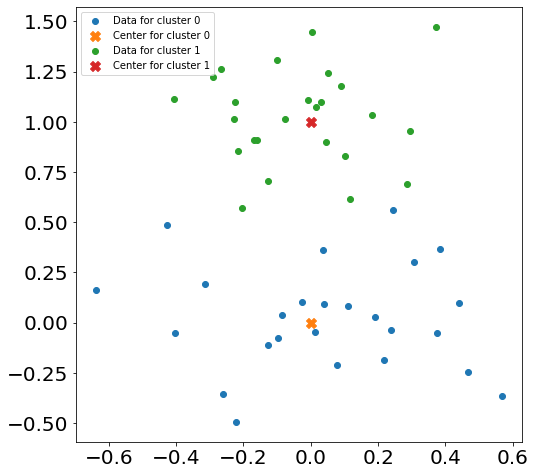

In [4]:
# Generate sample data
np.random.seed(0)
centers = np.array([[0,0], [0,1]])
n_clusters = centers.shape[0]
x, labels = make_blobs(n_samples=50, centers=centers, cluster_std=0.25)

plot_cluster(plt, x, labels, centers)

Number of iterations needed: 3


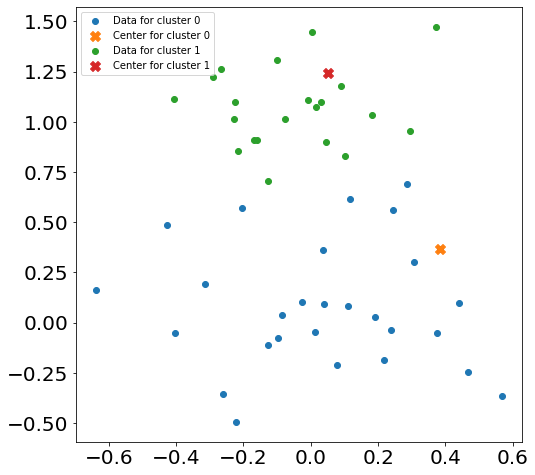

In [5]:
# KMedians - Classic computation
k_medians_classic = KMedians(n_clusters=len(centers), max_iterations=1000, random_state=0, distance_calculation_method='classic')
k_medians_classic.fit(x)
print(f'Number of iterations needed: {k_medians_classic.n_iter}')

plot_cluster(plt, x, k_medians_classic.labels, k_medians_classic.cluster_centers)

Number of iterations needed: 2


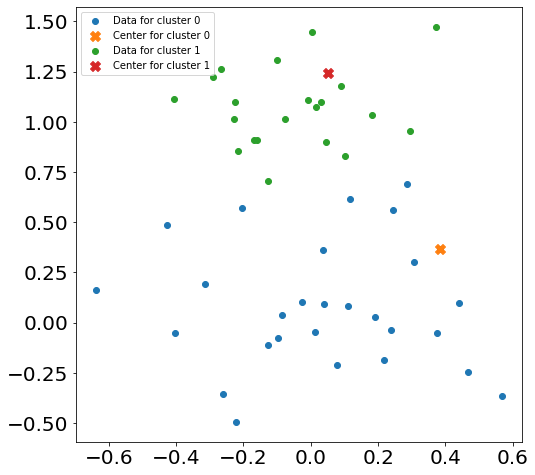

In [6]:
# KMedians - Quantum computation (simulated)
k_medians_quantum = KMedians(n_clusters=len(centers), max_iterations=1000, random_state=0, distance_calculation_method='quantum')
k_medians_quantum.fit(x)
print(f'Number of iterations needed: {k_medians_quantum.n_iter}')

plot_cluster(plt, x, k_medians_quantum.labels, k_medians_quantum.cluster_centers)

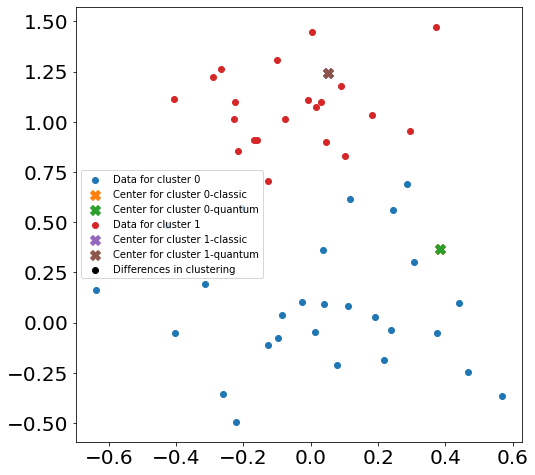

In [7]:
compare_clusters(plt, x, k_medians_classic.labels, k_medians_quantum.labels, k_medians_classic.cluster_centers, k_medians_quantum.cluster_centers)